In [4]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import numpy as np  

from tile_units import TileUnit
from tile_map import Tiling

<AxesSubplot:>

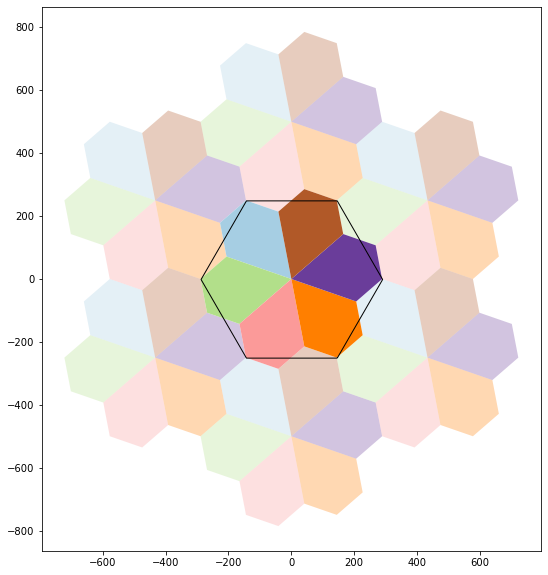

In [5]:
unit = TileUnit(tiling_type = "laves", laves_code = "3.3.3.3.6", 
                crs = 2193, spacing = 500)

ax = unit.get_local_patch(r = 1).plot(column = "element_id", alpha = 0.3,
                                           figsize = (10, 10), cmap = "Paired")
unit.elements.plot(ax = ax, column = "element_id", cmap = "Paired")
unit.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")

In [4]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

In [11]:
tiling = Tiling(unit, ak, id_var = "DZ2018")
t = tiling.get_tiled_map(rotation = 15, prioritise_tiles = True)

<AxesSubplot:>

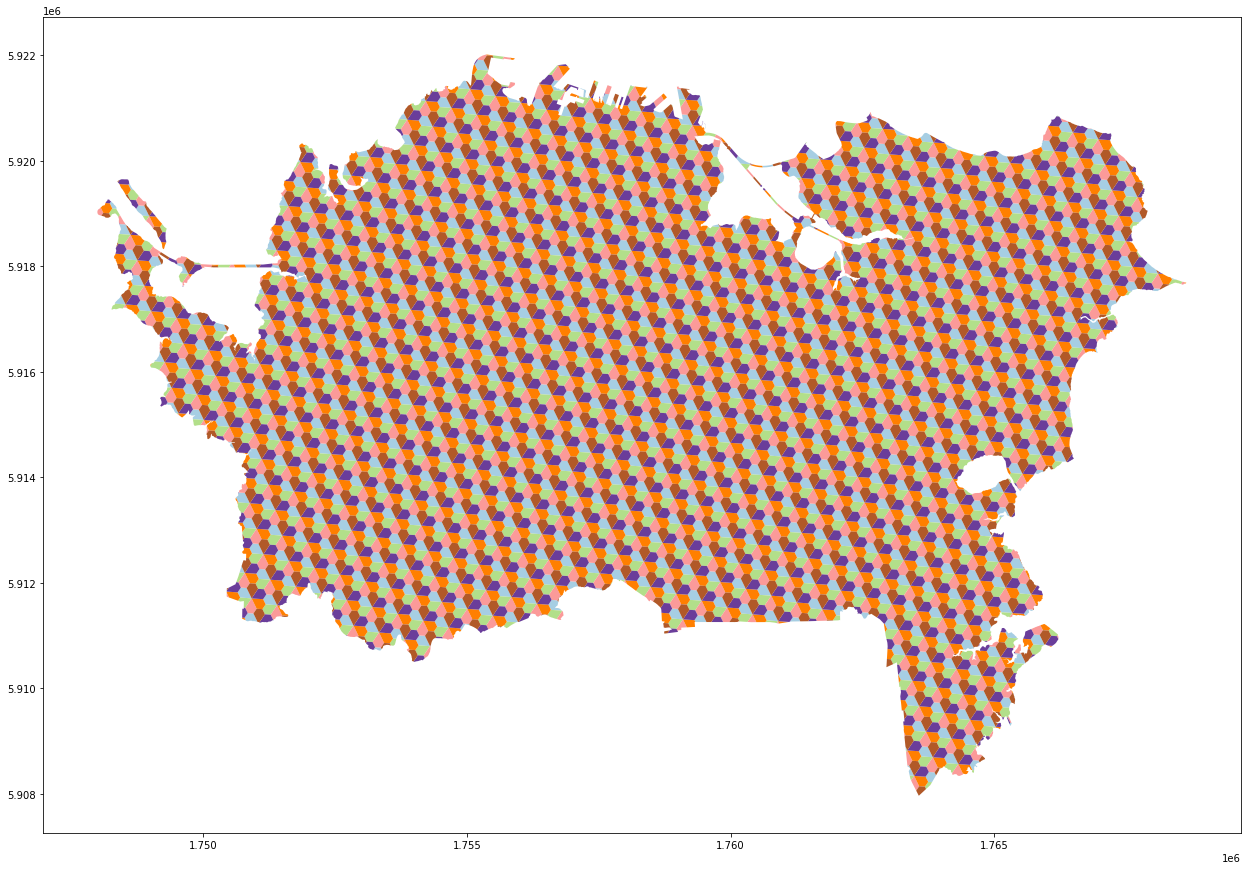

In [27]:
t.plot(column = "element_id", cmap = "Paired", figsize = (24, 15))

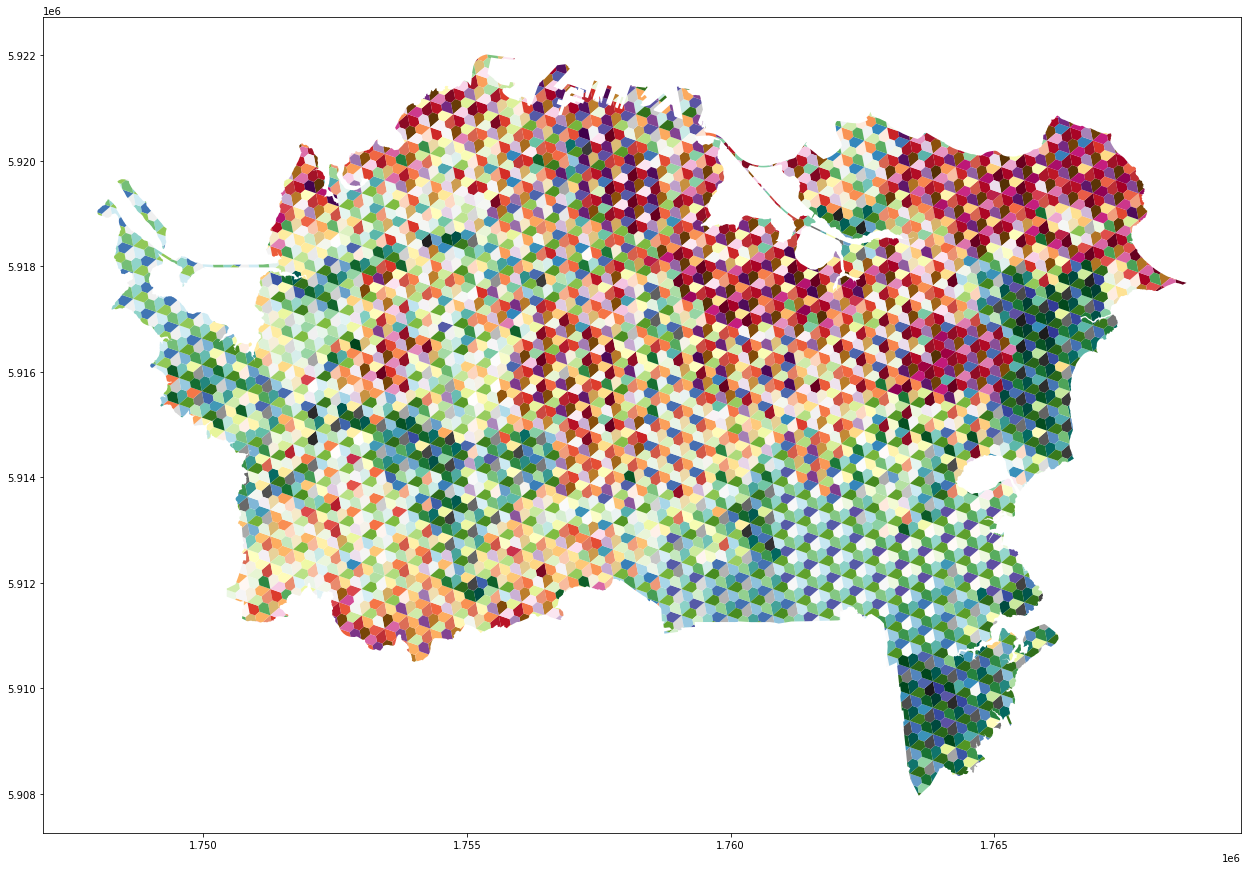

In [8]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

groups = set(t.element_id)
cols = [x for x in t.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr", "viridis")
# cmaps = ["Greys"] * 8

for group, col, cmap in zip(groups, cols, cmaps):
    t[t.element_id == group].plot(ax = ax, column = col, 
                                       cmap = cmap, k = 100)